In [95]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
%matplotlib inline 

In [96]:
train = pd.read_csv('Pokemon.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [97]:
train2 = pd.read_csv('pokemon_data_gen8.csv')
train3 = pd.read_csv('pokemon_data_gen9.csv')
train2.head()

,index,name,type,pokemon_species,pokemon_abilities,pokemon_weight,pokemon_height,pokemon_male,pokemon_female,pokemon_egg,...,unova_bw2_number,kalos_ce_number,kalos_co_number,kalos_m_number,alola_sm_number,alola_u_number,galar_number,galar_ia_number,galar_ct_number,paldea_number
0,810,Grookey,Grass,Chimp Pokémon,Overgrow,5.0 kg.,0.3 m,87.5,12.5,"Field,Grass",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,811,Thwackey,Grass,Beat Pokémon,Overgrow,14 kg,0.7 m,87.5,12.5% ♀,"Field,Grass",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,812,Rillaboom,Grass,Drummer Pokémon,Overgrow,90 kg,2.1 m,87.5,12.5% ♀,"Field,Grass",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,813,Scorbunny,"Fire,fire",Rabbit Pokémon,Blaze,4.5 kg,0.3 m,87.5,12.5% ♀,"Field,Human-Like",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,814,Raboot,fire,Rabbit Pokémon,Blaze,9.0 kg,0.6 m,87.5,12.5% ♀,"Field,Human-Like",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
train2[['Type 1', 'Type 2']] = train2['type'].str.split(',', expand=True)
train2 = train2[['index','Type 1','Type 2']]
train2['Type 2'].replace({None: np.nan}, inplace=True)
train3[['Type 1', 'Type 2']] = train3['type'].str.split(',', expand=True)
train3 = train3[['index','Type 1','Type 2']]
train3['Type 2'].replace({None: np.nan}, inplace=True)
train2.head()

C:\Users\aorti\AppData\Local\Temp\ipykernel_33420\448637206.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train2['Type 2'].replace({None: np.nan}, inplace=True)
C:\Users\aorti\AppData\Local\Temp\ipykernel_33420\448637206.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,index,Type 1,Type 2
0,810,Grass,NaN
1,811,Grass,NaN
2,812,Grass,NaN
3,813,Fire,fire
4,814,fire,NaN


In [99]:
train3.head()

,index,Type 1,Type 2
0,906,Grass,NaN
1,907,Grass,NaN
2,908,Grass,Dark
3,909,Fire,Fire
4,910,Fire,NaN


In [100]:
train2.rename(columns={'index': '#'}, inplace=True)
train3.rename(columns={'index': '#'}, inplace=True)
train2.head()

,#,Type 1,Type 2
0,810,Grass,NaN
1,811,Grass,NaN
2,812,Grass,NaN
3,813,Fire,fire
4,814,fire,NaN


In [101]:
train2['Type 1'] = train2['Type 1'].str.lower()
train2['Type 2'] = train2['Type 2'].str.lower()
train3['Type 1'] = train3['Type 1'].str.lower()
train3['Type 2'] = train3['Type 2'].str.lower()

mask = train2['Type 2'] == train2['Type 1']
train2.loc[mask, 'Type 2'] = np.nan
mask = train3['Type 2'] == train3['Type 1']
train3.loc[mask, 'Type 2'] = np.nan

train2.head()

,#,Type 1,Type 2
0,810,grass,NaN
1,811,grass,NaN
2,812,grass,NaN
3,813,fire,NaN
4,814,fire,NaN


In [102]:
train = train[["#","Type 1","Type 2"]]
train.head()

,#,Type 1,Type 2
0,1,Grass,Poison
1,2,Grass,Poison
2,3,Grass,Poison
3,3,Grass,Poison
4,4,Fire,NaN


In [103]:
train['Type 1'] = train['Type 1'].str.lower()
train['Type 2'] = train['Type 2'].str.lower()
train = pd.concat([train, train2, train3], axis=0)
train = train.sort_values(by='#')
train.tail()

,#,Type 1,Type 2
100,1006,fairy,fighting
101,1007,fighting,dragon
102,1008,electric,dragon
103,1009,water,dragon
104,1010,grass,psychic


In [104]:
train  = train.drop_duplicates(subset='#', keep='first')
train.reset_index(drop=True, inplace=True)
train.head()

,#,Type 1,Type 2
0,1,grass,poison
1,2,grass,poison
2,3,grass,poison
3,4,fire,NaN
4,5,fire,NaN


In [105]:
types = pd.concat([train['Type 1'], train['Type 2']])
types.unique()


array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying', nan], dtype=object)

In [106]:
# Assuming you have a DataFrame named 'train' with columns 'Type 1' and 'Type 2'
types = pd.concat([train['Type 1'], train['Type 2']])

# Get unique types
unique_types = types.dropna().unique()

# Create binary columns for each unique type
for col in unique_types:
    train[col] = train.apply(lambda row: 1 if col in (row['Type 1'], row['Type 2']) else 0, axis=1)

# Create a new column 'Type' containing a list of types for each row
train['Type'] = train.apply(lambda row: [t for t in (row['Type 1'], row['Type 2']) if pd.notna(t)], axis=1)

# Drop the original 'Type 1' and 'Type 2' columns
train.drop(['Type 1', 'Type 2'], axis=1, inplace=True)

# Display the resulting DataFrame
print(train)


        #  grass  fire  water  bug  normal  poison  electric  ground  fairy  \
0       1      1     0      0    0       0       1         0       0      0   
1       2      1     0      0    0       0       1         0       0      0   
2       3      1     0      0    0       0       1         0       0      0   
3       4      0     1      0    0       0       0         0       0      0   
4       5      0     1      0    0       0       0         0       0      0   
..    ...    ...   ...    ...  ...     ...     ...       ...     ...    ...   
917  1006      0     0      0    0       0       0         0       0      1   
918  1007      0     0      0    0       0       0         0       0      0   
919  1008      0     0      0    0       0       0         1       0      0   
920  1009      0     0      1    0       0       0         0       0      0   
921  1010      1     0      0    0       0       0         0       0      0   

     fighting  psychic  rock  ghost  ice  dragon  d

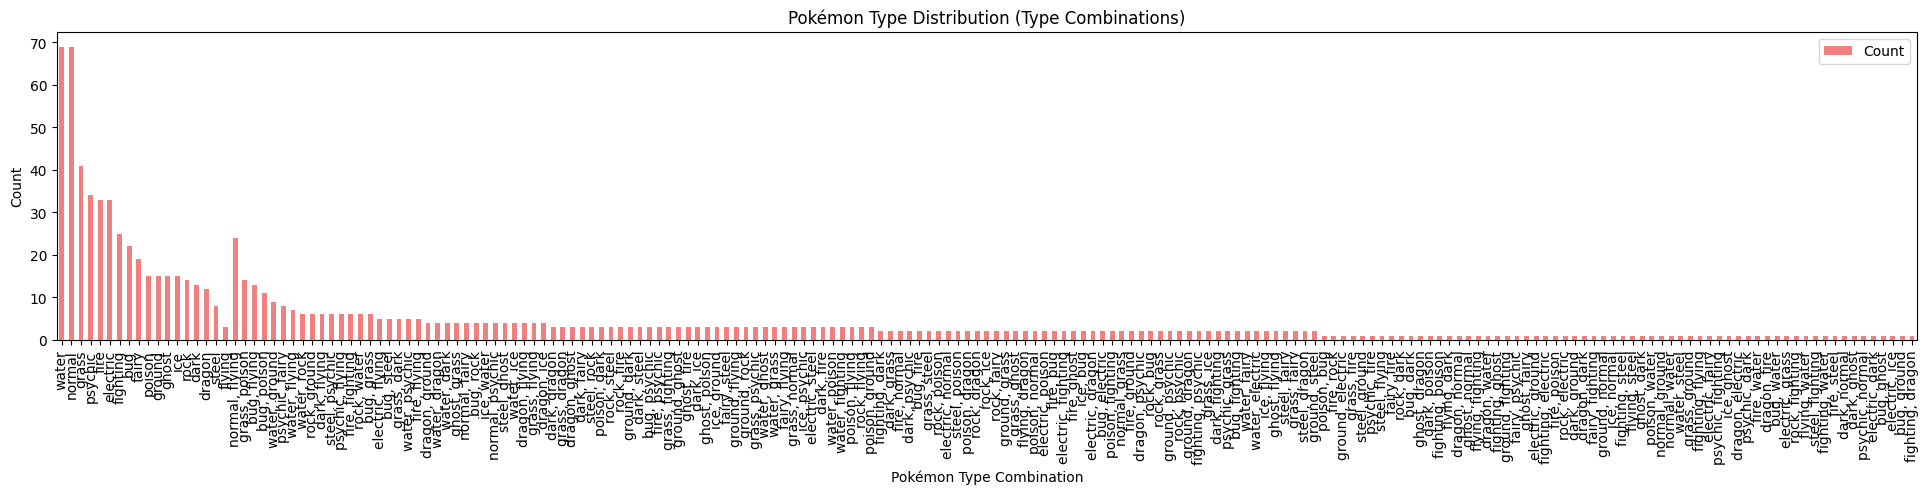

In [107]:
train['Type_Combination'] = train['Type'].apply(lambda types: ', '.join(types))

# Get the count of each type combination
types_combinations_count = train['Type_Combination'].value_counts().reset_index(name='Count')
types_combinations_count.rename(columns={'index': 'Type_Combination'}, inplace=True)

# Add a new column 'Num_Types' to represent the number of types in each combination
types_combinations_count['Num_Types'] = types_combinations_count['Type_Combination'].apply(lambda x: len(x.split(', ')))

# Sort the DataFrame first by 'Num_Types' in ascending order, then by 'Count' in descending order
types_combinations_count = types_combinations_count.sort_values(by=['Num_Types', 'Count'], ascending=[True, False])

# Plot the bar chart for type combinations with a wider figure
types_combinations_count.plot(x='Type_Combination', y='Count', kind='bar', color='lightcoral', figsize=(24, 4))
plt.title('Pokémon Type Distribution (Type Combinations)')
plt.xlabel('Pokémon Type Combination')
plt.ylabel('Count')
plt.show()

water       142
normal      120
grass       110
flying      101
psychic      92
bug          81
fire         74
poison       72
ground       71
rock         69
dark         68
electric     62
fighting     62
dragon       58
steel        55
fairy        53
ghost        52
ice          47
dtype: int64


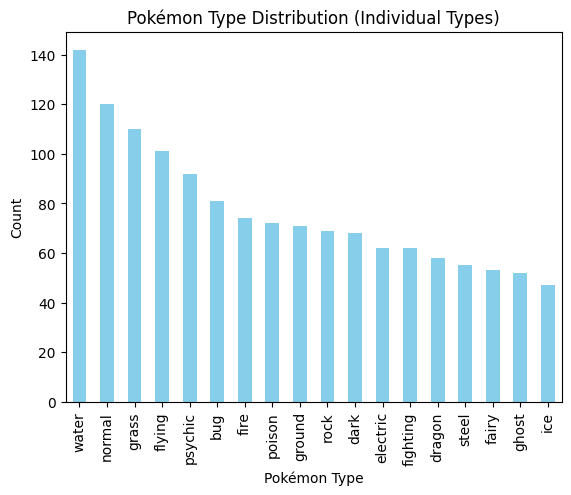

In [108]:
train.drop(['Type'], axis=1, inplace=True)
train.drop(['Type_Combination'], axis=1, inplace=True)
# Display the resulting DataFrame
#print(train)

# Plot the bar chart for individual types
types_count = train.iloc[:, 1:].sum().sort_values(ascending=False)
print(types_count)
types_count.plot(kind='bar', color='skyblue')
plt.title('Pokémon Type Distribution (Individual Types)')
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.show()

In [109]:
train.head()

,#,grass,fire,water,bug,normal,poison,electric,ground,fairy,fighting,psychic,rock,ghost,ice,dragon,dark,steel,flying
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img("pokemon/"+str(train["#"][i])+'.png',target_size=(100,100,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/922 [00:00<?, ?it/s]

 63%|██████▎   | 579/922 [00:00<00:00, 1940.14it/s]c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 922/922 [00:00<00:00, 1940.60it/s]


In [112]:
X.shape

(922, 100, 100, 3)

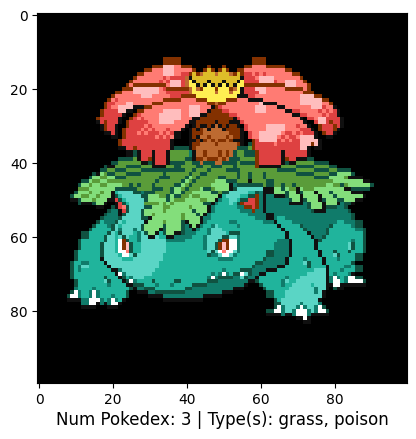

In [113]:
row_num = 2


fila = train.iloc[row_num,:]
types = fila.index[fila==1]
types_str = ', '.join(str(type_x) for type_x in types)
pokedex_num = fila["#"]
etiqueta = 'Num Pokedex: '+str(pokedex_num)+' | Type(s): '+types_str
plt.imshow(X[row_num],cmap='gray')
plt.text(0.5, -0.1, etiqueta, ha='center', va='center', transform=plt.gca().transAxes, color='black', fontsize=12)
plt.show()

In [114]:
y = np.array(train.drop(['#'],axis=1))
y.shape

(922, 18)

In [115]:
print(X.shape,y.shape)

(922, 100, 100, 3) (922, 18)


In [116]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [117]:

X_train, X_test, y_train, y_test = train_test_split(X[10:], y[10:], random_state=42, test_size=0.1)

In [118]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='sigmoid'))

c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [119]:

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 96, 96, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 44, 44, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 18, 18, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,098 (820.70 KB)

 Trainable params: 210,098 (820.70 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.0476 - loss: 0.6320 - val_accuracy: 0.0870 - val_loss: 0.4903
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.0693 - loss: 0.4865 - val_accuracy: 0.0978 - val_loss: 0.4085
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.0759 - loss: 0.4195 - val_accuracy: 0.0978 - val_loss: 0.3786
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.0651 - loss: 0.3729 - val_accuracy: 0.1196 - val_loss: 0.3797
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.0544 - loss: 0.3652 - val_accuracy: 0.1522 - val_loss: 0.3365
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.0727 - loss: 0.3443 - val_accuracy: 0.0761 - val_loss: 0.3354
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.0557 - loss: 0.3398 - val_accuracy: 0.1522 - val_loss: 0.3242
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.0775 - loss: 0.3358 - val_accuracy: 0.

In [126]:

img = image.load_img('pokemon/800.png',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
water (0.218)
psychic (0.207)
normal (0.206)


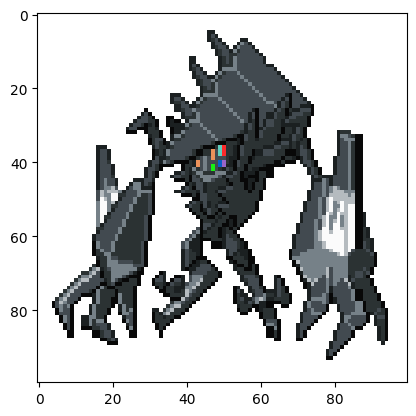

In [127]:
classes = np.array(train.columns[1:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)